<a href="https://colab.research.google.com/github/malowana/NLP_budzet_obywatelski/blob/main/Budzet_obywatelski.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U spacy
!pip install -U NLTK

In [ ]:
!pip install bertopic[visualization]

In [ ]:
!pip install texthero
!pip3 install catboost
!pip install scikit-plot

In [ ]:
import pandas as pd
import numpy as np
import json
import texthero as hero
import pickle
import spacy
import nltk

from gensim.utils import simple_preprocess
import catboost as ctb
import xgboost as xgb
from gensim.models import FastText
from scikitplot.estimators import plot_learning_curve
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from gensim.models import Word2Vec, Phrases

from bertopic import BERTopic
import pyLDAvis.gensim_models as vis
import pyLDAvis
import gensim
from gensim import corpora
from pprint import pprint

In [ ]:
!python -m spacy download pl_core_news_md

In [99]:
#df = pd.read_csv('/content/drive/MyDrive/Konkursy Kaggle/Budżet obywatelski/bo.csv').reset_index(drop=True)
df = pd.read_excel('/content/drive/My Drive/Konkursy Kaggle/Budżet obywatelski/budzet_obywatelski.xlsx', sheet_name='Arkusz1')

In [7]:
df.head()

,rok,miasto,nazwa,WSZYSTKO
0,2020,GDYNIA,Projektistatus,0
1,2020,GDYNIA,Doposażenie parku pomiędzy Estakadą Kwiatkowsk...,3
2,2020,GDYNIA,Cykliczne warsztaty dla seniorów z dzielnicy O...,0
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3
4,2020,GDYNIA,Montaż słupów oświetleniowych na chodniku przy...,0


In [8]:
df.columns

Index(['rok ', 'miasto ', 'nazwa', 'WSZYSTKO'], dtype='object')

In [100]:
df = df[~df['nazwa'].isna()]

In [101]:
df = df.drop_duplicates()

In [ ]:
#df['nazwa'] = df['nazwa'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df["text_hero"] = hero.clean(df["nazwa"])
df.head(30)

,rok,miasto,nazwa,WSZYSTKO,text_hero
0,2020,GDYNIA,Projektistatus,0,projektistatus
1,2020,GDYNIA,Doposażenie parku pomiędzy Estakadą Kwiatkowsk...,3,doposazenie parku pomiedzy estakada kwiatkowsk...
2,2020,GDYNIA,Cykliczne warsztaty dla seniorów z dzielnicy O...,0,cykliczne warsztaty dla seniorow z dzielnicy o...
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3,ogrod sasiedzki przy dzikim sadzie ul zrodlana
4,2020,GDYNIA,Montaż słupów oświetleniowych na chodniku przy...,0,montaz slupow oswietleniowych na chodniku przy...
5,2020,GDYNIA,Cotygodniowe weekendowe lekcje tańca towarzysk...,0,cotygodniowe weekendowe lekcje tanca towarzysk...
6,2020,GDYNIA,Meble miejskie zaprojektowane przez dzieci. Po...,0,meble miejskie zaprojektowane przez dzieci pod...
7,2020,GDYNIA,"Odnowienie podwórek w obrębie ulic Płk. Dąbka,...",1,odnowienie podworek w obrebie ulic plk dabka k...
8,2020,GDYNIA,Poprawa atrakcyjności skweru przy skrzyżowaniu...,5,poprawa atrakcyjnosci skweru przy skrzyzowaniu...
9,2020,GDYNIA,Radarowe wyświetlacze prędkości na ul. Morskiej,0,radarowe wyswietlacze predkosci na ul morskiej


In [5]:
nlp = spacy.load("pl_core_news_md")

In [ ]:
#docs = list(nlp.pipe(df.nazwa))

In [13]:
#usuwanie stopwords, znaki interpunkcyjne, białe znaki etc.
def apply_lemma(text):
  #text=nlp(text)
  words = [token.lemma_ for token in text
          if not token.is_stop and not token.is_punct and not token.is_space and not token.is_digit and len(token) > 2]
  return words

text=nlp(df["nazwa"][4])
apply_lemma(text)


['montaż',
 'słup',
 'oświetleniowych',
 'chodnik',
 'niski',
 'odcinek',
 'pomiędzy',
 'bohater',
 'getto',
 'warszawski',
 'hodowlaną']

In [ ]:

#df['hero_without_sw'] = df['hero_without_sw'].apply(str)

In [103]:
df["text_hero_lemma"] = df["text_hero"].map(lambda x: apply_lemma(nlp(x)))
df.head()

,rok,miasto,nazwa,WSZYSTKO,text_hero,text_hero_lemma
0,2020,GDYNIA,Projektistatus,0,projektistatus,[projektistatus]
1,2020,GDYNIA,Doposażenie parku pomiędzy Estakadą Kwiatkowsk...,3,doposazenie parku pomiedzy estakada kwiatkowsk...,"[doposazenie, park, pomiedzy, estakada, kwiatk..."
2,2020,GDYNIA,Cykliczne warsztaty dla seniorów z dzielnicy O...,0,cykliczne warsztaty dla seniorow z dzielnicy o...,"[cykliczny, warsztat, seniorow, dzielnica, obl..."
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3,ogrod sasiedzki przy dzikim sadzie ul zrodlana,"[ogroda, sasiedzki, dziki, sadź, zrodlana]"
4,2020,GDYNIA,Montaż słupów oświetleniowych na chodniku przy...,0,montaz slupow oswietleniowych na chodniku przy...,"[montaz, slupow, oswietleniowych, chodnik, nis..."


In [104]:
df["text_hero_lemma2"] = df["text_hero_lemma"].map(lambda x: " ".join(x))

In [105]:
df.head()

,rok,miasto,nazwa,WSZYSTKO,text_hero,text_hero_lemma,text_hero_lemma2
0,2020,GDYNIA,Projektistatus,0,projektistatus,[projektistatus],projektistatus
1,2020,GDYNIA,Doposażenie parku pomiędzy Estakadą Kwiatkowsk...,3,doposazenie parku pomiedzy estakada kwiatkowsk...,"[doposazenie, park, pomiedzy, estakada, kwiatk...",doposazenie park pomiedzy estakada kwiatkowski...
2,2020,GDYNIA,Cykliczne warsztaty dla seniorów z dzielnicy O...,0,cykliczne warsztaty dla seniorow z dzielnicy o...,"[cykliczny, warsztat, seniorow, dzielnica, obl...",cykliczny warsztat seniorow dzielnica obluze r...
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3,ogrod sasiedzki przy dzikim sadzie ul zrodlana,"[ogroda, sasiedzki, dziki, sadź, zrodlana]",ogroda sasiedzki dziki sadź zrodlana
4,2020,GDYNIA,Montaż słupów oświetleniowych na chodniku przy...,0,montaz slupow oswietleniowych na chodniku przy...,"[montaz, slupow, oswietleniowych, chodnik, nis...",montaz slupow oswietleniowych chodnik niski od...


# Wizualizacja

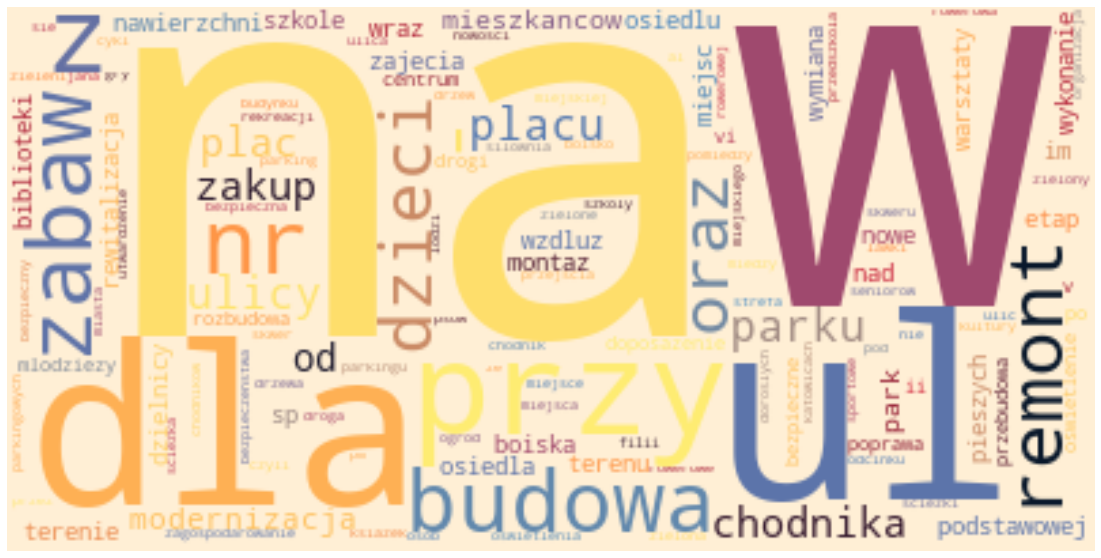

In [17]:
hero.visualization.wordcloud(df["text_hero"])

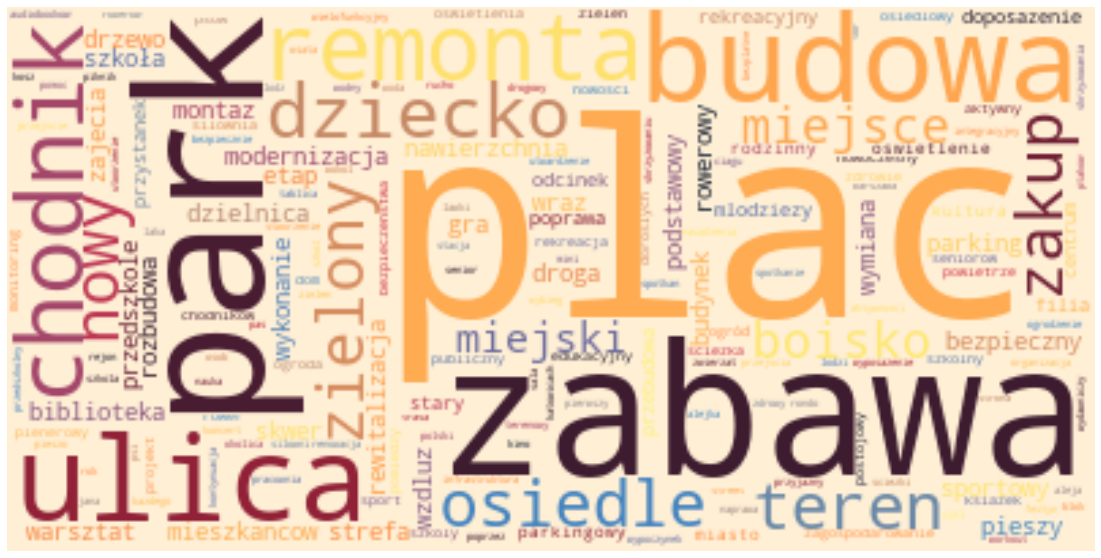

In [106]:
hero.visualization.wordcloud(df["text_hero_lemma2"])

In [94]:
from collections import Counter
cnt = Counter()
df['text_hero_lemma2'].map(cnt.update)
cnt.most_common()

[('plac', 1971),
 ('zabawa', 1906),
 ('park', 1721),
 ('budowa', 1681),
 ('ulica', 1581),
 ('remonta', 1322),
 ('chodnik', 1315),
 ('dziecko', 1288),
 ('osiedle', 965),
 ('teren', 962),
 ('zielony', 910),
 ('nowy', 883),
 ('zakup', 863),
 ('miejsce', 831),
 ('boisko', 829),
 ('miejski', 793),
 ('modernizacja', 780),
 ('bezpieczny', 764),
 ('rowerowy', 740),
 ('biblioteka', 687),
 ('mieszkancow', 632),
 ('sportowy', 619),
 ('nawierzchnia', 614),
 ('pieszy', 587),
 ('dzielnica', 578),
 ('podstawowy', 558),
 ('droga', 504),
 ('wraz', 493),
 ('wzdluz', 482),
 ('skwer', 481),
 ('rewitalizacja', 479),
 ('parking', 459),
 ('zajecia', 458),
 ('etap', 457),
 ('drzewo', 425),
 ('przedszkole', 408),
 ('wymiana', 401),
 ('warsztat', 394),
 ('szkoła', 379),
 ('wykonanie', 362),
 ('strefa', 353),
 ('montaz', 346),
 ('gra', 340),
 ('rozbudowa', 323),
 ('budynek', 318),
 ('rekreacyjny', 314),
 ('doposazenie', 313),
 ('mlodziezy', 312),
 ('stary', 302),
 ('filia', 301),
 ('centrum', 299),
 ('przebudowa

In [23]:
sum(cnt.values())

144065

In [107]:
df[df['text_hero_lemma2'].str.contains("sadź")]

,rok,miasto,nazwa,WSZYSTKO,text_hero,text_hero_lemma,text_hero_lemma2
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3,ogrod sasiedzki przy dzikim sadzie ul zrodlana,"[ogroda, sasiedzki, dziki, sadź, zrodlana]",ogroda sasiedzki dziki sadź zrodlana
3900,2020,KATOWICE,Nasadzenie 15 sztuk drzewek i 40 sztuk krzewów...,8,nasadzenie sztuk drzewek sztuk krzewow owocowy...,"[nasadzenie, sztuka, drzewko, sztuka, krzewow,...",nasadzenie sztuka drzewko sztuka krzewow owoco...


# LDA

In [108]:
headline_text = df['text_hero']

In [109]:
processed_docs = df['text_hero_lemma']

In [131]:
vocab = gensim.corpora.Dictionary(processed_docs)
len(vocab)

18846

In [117]:
vocab.filter_extremes(no_below=2, no_above=0.50)
len(vocab)

9633

In [132]:
bow_corpus = [vocab.doc2bow(doc) for doc in processed_docs]
bow_corpus[10]

[(24, 1),
 (26, 1),
 (46, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1)]

In [133]:
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [143]:
%time lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=15, id2word=vocab, passes=2)

CPU times: user 28 s, sys: 1.42 s, total: 29.4 s
Wall time: 29.9 s


In [144]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    print("")

Topic: 0 
Words: 0.032*"zielony" + 0.024*"warszawa" + 0.024*"dziecko" + 0.021*"zajecia" + 0.012*"sport" + 0.012*"zdrowy" + 0.012*"mieszkancow" + 0.012*"rodzinny" + 0.010*"piknik" + 0.009*"skwer"

Topic: 1 
Words: 0.049*"nowy" + 0.025*"dzielnica" + 0.025*"drzewo" + 0.023*"biblioteka" + 0.018*"spotkanie" + 0.014*"warsztat" + 0.011*"zielony" + 0.010*"ursynow" + 0.010*"zakup" + 0.009*"huta"

Topic: 2 
Words: 0.122*"plac" + 0.119*"zabawa" + 0.068*"park" + 0.024*"dziecko" + 0.013*"doposazenie" + 0.012*"modernizacja" + 0.010*"street" + 0.010*"rozbudowa" + 0.009*"przedszkole" + 0.009*"kolorowy"

Topic: 3 
Words: 0.032*"kultura" + 0.016*"rower" + 0.016*"miejski" + 0.014*"stacja" + 0.014*"dom" + 0.012*"zakup" + 0.011*"park" + 0.010*"biblioteka" + 0.009*"rowerow" + 0.009*"zielony"

Topic: 4 
Words: 0.032*"remonta" + 0.023*"chodnik" + 0.015*"tablica" + 0.013*"parking" + 0.011*"przystanek" + 0.010*"festiwal" + 0.009*"informacyjny" + 0.009*"autobusowy" + 0.008*"historia" + 0.007*"czysty"

Topic: 5 


In [141]:
%time lda_model = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=vocab, passes=2, workers=10)

CPU times: user 9.63 s, sys: 570 ms, total: 10.2 s
Wall time: 19.4 s


In [142]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.007*"park" + 0.006*"zabawa" + 0.005*"plac" + 0.005*"chodnik" + 0.005*"dziecko" + 0.005*"warsztat" + 0.004*"budowa" + 0.004*"remonta" + 0.004*"nowy" + 0.003*"ulica"
Topic: 1 
Words: 0.006*"dziecko" + 0.005*"boisko" + 0.004*"ulica" + 0.004*"warsztat" + 0.004*"podstawowy" + 0.004*"chodnik" + 0.004*"remonta" + 0.003*"zielony" + 0.003*"sportowy" + 0.003*"biblioteka"
Topic: 2 
Words: 0.005*"plac" + 0.005*"ulica" + 0.005*"remonta" + 0.004*"zajecia" + 0.004*"bezpieczny" + 0.004*"dziecko" + 0.004*"chodnik" + 0.004*"zabawa" + 0.004*"nowy" + 0.004*"park"
Topic: 3 
Words: 0.009*"zabawa" + 0.009*"plac" + 0.005*"dziecko" + 0.004*"chodnik" + 0.004*"ulica" + 0.004*"budowa" + 0.004*"modernizacja" + 0.003*"remonta" + 0.003*"zielony" + 0.003*"biblioteka"
Topic: 4 
Words: 0.007*"biblioteka" + 0.006*"warszawa" + 0.005*"zakup" + 0.005*"zielony" + 0.004*"dziecko" + 0.003*"miejski" + 0.003*"park" + 0.003*"nowosci" + 0.003*"filia" + 0.003*"plac"


In [ ]:
vis_data = gensimvis.prepare(lda_model, bow_corpus, vocab)
pyLDAvis.display(vis_data)

In [146]:
df['topics'] = [int(str(sorted(lda_model[i],reverse=True,key=lambda x: x[1])[0][0]).zfill(3)) for i in bow_corpus]

In [147]:
df.head()

,rok,miasto,nazwa,WSZYSTKO,text_hero,text_hero_lemma,text_hero_lemma2,topics
0,2020,GDYNIA,Projektistatus,0,projektistatus,[projektistatus],projektistatus,0
1,2020,GDYNIA,Doposażenie parku pomiędzy Estakadą Kwiatkowsk...,3,doposazenie parku pomiedzy estakada kwiatkowsk...,"[doposazenie, park, pomiedzy, estakada, kwiatk...",doposazenie park pomiedzy estakada kwiatkowski...,0
2,2020,GDYNIA,Cykliczne warsztaty dla seniorów z dzielnicy O...,0,cykliczne warsztaty dla seniorow z dzielnicy o...,"[cykliczny, warsztat, seniorow, dzielnica, obl...",cykliczny warsztat seniorow dzielnica obluze r...,1
3,2020,GDYNIA,"Ogród Sąsiedzki przy Dzikim Sadzie, ul. Źródlana",3,ogrod sasiedzki przy dzikim sadzie ul zrodlana,"[ogroda, sasiedzki, dziki, sadź, zrodlana]",ogroda sasiedzki dziki sadź zrodlana,13
4,2020,GDYNIA,Montaż słupów oświetleniowych na chodniku przy...,0,montaz slupow oswietleniowych na chodniku przy...,"[montaz, slupow, oswietleniowych, chodnik, nis...",montaz slupow oswietleniowych chodnik niski od...,13


# BERTtopic

In [ ]:
docs = list(df.loc[:, 'nazwa'].values)

docs = [str(elem) for elem in docs] 
# Należy zrzucić docs do stringa, bo inaczej gdzieś w połowie liczenia wyskakuje
# błąd o znalezionych wartościach float:
# sequence item 0: expected str instance, float found

model = BERTopic(language='polish')

In [ ]:
path = '../content/drive/MyDrive/Konkursy Kaggle/Budzet obywatelski/'

In [ ]:
topics, probs = model.fit_transform(docs)
model.save(path+'models/main_bert_topic.model')
with open(path+'models/main_bert_topics_probs.npy', 'wb') as f:
    np.save(f, topics)
    np.save(f, probs)

In [ ]:
# Wczytanie zapisanych modeli
topic_model = BERTopic.load(path+'models/main_bert_topic.model')
with open(path+'models/main_bert_topics_probs.npy', 'rb') as f:
    topics = np.load(f)
    probs = np.load(f)

In [ ]:
# Sprawdzenie tematów
topic_model.get_topics()

In [ ]:
topic_dict = dict()
for n in range(-1, N_TOPICS):
  topic_dict[n] = [name for name, prob in topic_model.get_topic(n)]
  print(f'{n} {topic_dict[n]}', sep='\n')